<div style="color:blue"> Prediction Analysis Project 2020<br>
Supervisor Name: Eng. Mohammad Fathi – Wakeb Co.<br>
Group No. 1<br>
Project Description: <br>
This project is working on a store dataset that has pure data of five years ago. furthermore, this dataset contains the following data e.g.: (Number of branches, Sales, date of sale, items …etc.). The aims  of this project are predicting store sales for the next three months to gets highly commercial benefits for this store by exploring different time series </div>



## Day1: Explore and understand the dataset and its variables and do some cleaning and wrangling.


In [33]:
#use the libraries to analysiz the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [34]:
#read the dataset
df = pd.read_csv('train.csv')
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [35]:
df.tail()

date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


<span style="color:blue">Here we are converting the data type of "date" to DateTime then apply changes.<span>

In [37]:
df['date']=pd.to_datetime(df['date'])

In [38]:
#Check if there are a missing values
missing_df_data  = pd.concat([df.isnull().sum()], axis=1, keys=["Total of missing data"])  
missing_df_data 

Total of missing data
date                       0
store                      0
item                       0
sales                      0

In [39]:
#Check if there are a duplicated values
df.duplicated().sum()

0

In [9]:
#The number of rows in each column
df.count()

date     913000
store    913000
item     913000
sales    913000
dtype: int64

In [ ]:
df.describe()

## Day2: Visualize data and relationship between every variable.

### 1- The Store  Branches:

<span style="color:blue">The Pie chart below shows that all the stores are equales.<span>

In [10]:
store1=df[df['store']== 1] 
store2=df[df['store']== 2] 
store3=df[df['store']== 3] 
store4=df[df['store']== 4] 
store5=df[df['store']== 5] 

In [11]:
store6=df[df['store']== 6] 
store7=df[df['store']== 7] 
store8=df[df['store']== 8] 
store9=df[df['store']== 9] 
store10=df[df['store']== 10] 

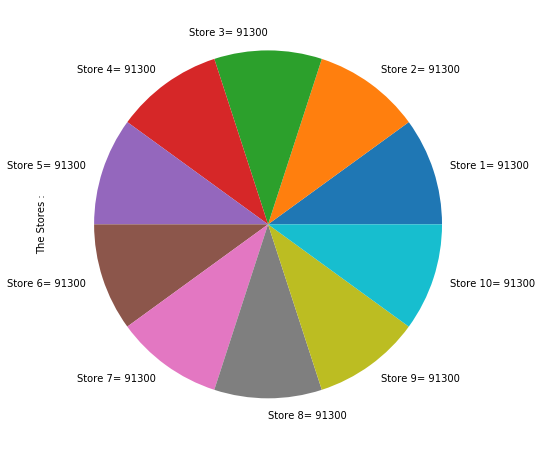

In [12]:
s1='Store 1= '+str(len(store1)) 
s2='Store 2= '+str(len(store2))  
s3='Store 3= '+str(len(store3))  
s4='Store 4= '+str(len(store4))  
s5='Store 5= '+str(len(store5)) 
s6='Store 6= '+str(len(store6)) 
s7='Store 7= '+str(len(store7)) 
s8='Store 8= '+str(len(store8)) 
s9='Store 9= '+str(len(store9)) 
s10='Store 10= '+str(len(store10)) 
snames = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]
series = pd.Series([len(store1),len(store2),len(store3),len(store4),len(store5),len(store6),len(store7),len(store8),len(store9),len(store10)], 
                   index=snames, 
                   name='The Stores :')

series.plot.pie(figsize=(8, 8))

### 2- The Items :

<span style="color:blue">The charts below show that all the "Items" are equals.<span>

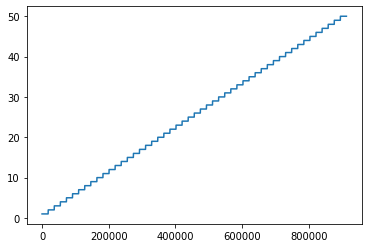

In [7]:
df.item.plot()

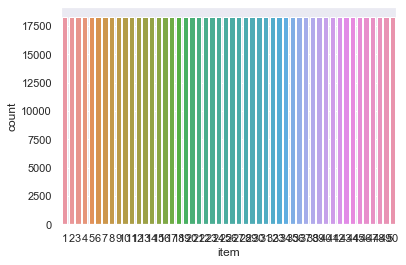

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="item", data=df )
 

In [ ]:
sns.distplot(df['item'], bins=10, kde=True)

In [ ]:
df.boxplot(column='item')

In [14]:
# Random number of item for test purpose(validation). 
item1=df[df['item']== 1] 
item49=df[df['item']== 49] 

In [15]:
len(item1)
 

18260

In [16]:
len(item49)

18260

### 2- The Sales :

<span style="color:blue"> The next table is to show all the stores and their total of sales furthermore, a Bar chart.<span>

In [50]:
df2=df.groupby('store').sales.sum()
df2

store
1     4315603
2     6120128
3     5435144
4     5012639
5     3631016
6     3627670
7     3320009
8     5856169
9     5025976
10    5360158
Name: sales, dtype: int64

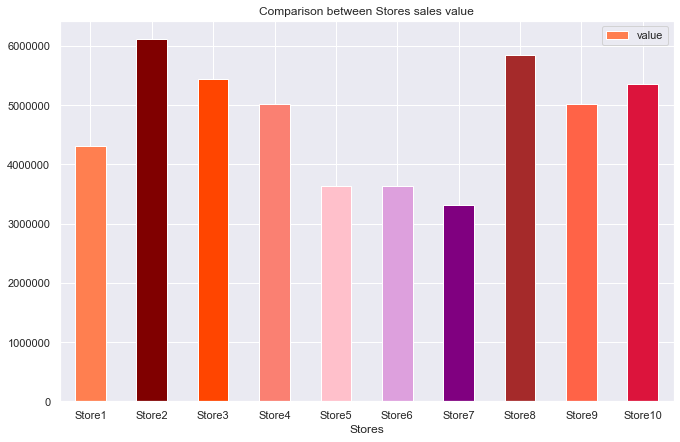

In [28]:
df = pd.DataFrame({'Stores':[  'Store1','Store2', 'Store3','Store4','Store5','Store6','Store7','Store8','Store9','Store10' ], 
                    'value':[store1.sales.sum(), store2.sales.sum(), store3.sales.sum(),store4.sales.sum(),store5.sales.sum(),store6.sales.sum(),store7.sales.sum(),store8.sales.sum(),store9.sales.sum(),store10.sales.sum()]})
df.plot.bar(x='Stores', y='value', rot=0 ,title="Comparison between Stores sales value",figsize=(11,7),color=['coral', 'maroon', 'orangered', 'salmon', 'pink','plum','purple','brown','tomato','crimson'] )
 
 
 
 

### 2- The Date :

<span style="color:blue">For this part, we reread the dataset with adding the index as date. <span>

In [45]:
df1 = pd.read_csv('train.csv', parse_dates = ['date'], index_col= 'date')

df1['2015-02':'2015-02'].sales.mean()

39.37978571428572

In [46]:
df1['2015-02':'2015-02']

store  item  sales
date                          
2015-02-01      1     1     17
2015-02-02      1     1      6
2015-02-03      1     1     10
2015-02-04      1     1      8
2015-02-05      1     1     18
...           ...   ...    ...
2015-02-24     10    50     50
2015-02-25     10    50     50
2015-02-26     10    50     53
2015-02-27     10    50     63
2015-02-28     10    50     68

[14000 rows x 3 columns]

<span style="color:blue">Classifying the sales depending on the months.<span>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [48]:
dategroub = df.groupby(df['date'].dt.strftime('%B'))['sales'].sum().sort_values()
dategroub

date
January      2753149
February     2776177
December     3050808
March        3666182
October      3967520
September    4130457
April        4136467
November     4141356
August       4580655
May          4582437
June         4726911
July         5192393
Name: sales, dtype: int64

<span style="color:blue">Rearrangement the months.<span>

In [43]:
dategroub1 = df.groupby(df['date'].dt.month)['sales'].sum() 
dategroub1

date
1     2753149
2     2776177
3     3666182
4     4136467
5     4582437
6     4726911
7     5192393
8     4580655
9     4130457
10    3967520
11    4141356
12    3050808
Name: sales, dtype: int64

<span style="color:blue">The chart below shows the peak of monthly sales.</span>

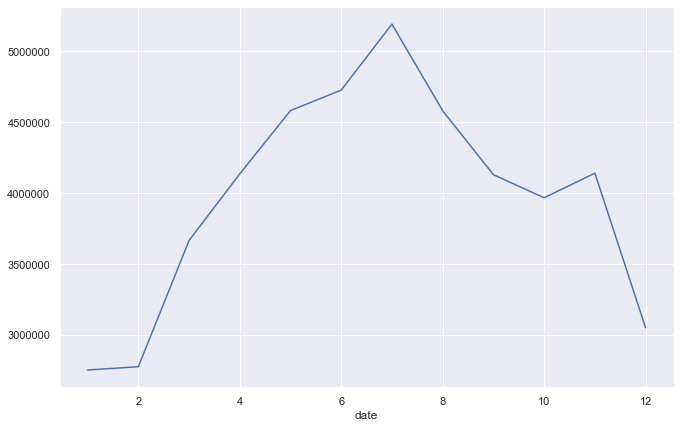

In [44]:
dategroub1.plot(figsize=(11,7))

### 4- Sales VS Date

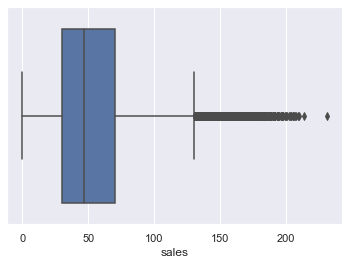

In [51]:
sns.boxplot(x=df['sales'])


In [52]:
df[(df['date'] >= '2013-01-01') & (df['date'] <= '2013-12-31')]

date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
911534 2013-12-27     10    50     53
911535 2013-12-28     10    50     53
911536 2013-12-29     10    50     66
911537 2013-12-30     10    50     29
911538 2013-12-31     10    50     47

[182500 rows x 4 columns]

In [53]:
df[(df['date'] >= '2014-01-01') & (df['date'] <= '2014-12-31')]

date  store  item  sales
365    2014-01-01      1     1      9
366    2014-01-02      1     1     14
367    2014-01-03      1     1     11
368    2014-01-04      1     1     20
369    2014-01-05      1     1     17
...           ...    ...   ...    ...
911899 2014-12-27     10    50     70
911900 2014-12-28     10    50     67
911901 2014-12-29     10    50     34
911902 2014-12-30     10    50     44
911903 2014-12-31     10    50     40

[182500 rows x 4 columns]

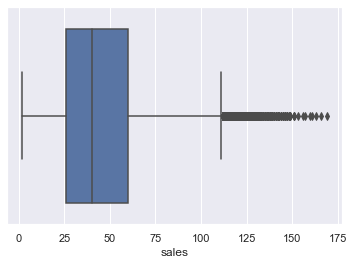

In [54]:
sns.boxplot(x=df[(df['date'] > '2013-01-01') & (df['date'] < '2013-12-01')].sales)

In [55]:
pd.DatetimeIndex(df['date']).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=913000)

In [56]:
a=df[(df['date'] >= '2013-01-01') & (df['date'] <= '2013-12-31')]

In [57]:
df1.index 

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

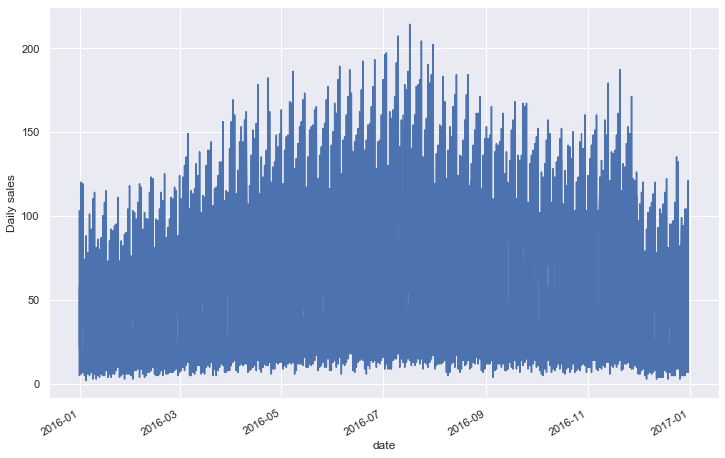

In [58]:
ax = df1.loc['2016', 'sales'].plot(figsize=(12, 8))
ax.set_ylabel('Daily sales');

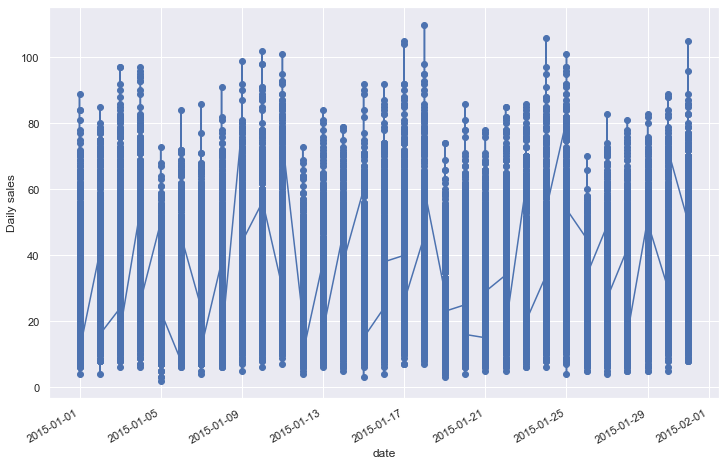

In [59]:
ax = df1.loc['2015-01':'2015-01', 'sales'].plot(marker='o', linestyle='-',figsize=(12, 8))
ax.set_ylabel('Daily sales');

### Coding for outliers

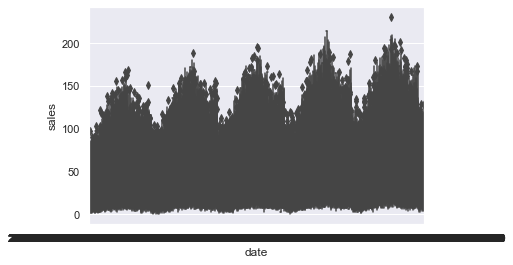

In [60]:
sns.boxplot(x='date', y='sales', data=df)

In [61]:
df['month'] = df['date'].dt.strftime('%b')

In [62]:
df['year'] = df['date'].dt.year

In [63]:
df.head()

date  store  item  sales month  year
0 2013-01-01      1     1     13   Jan  2013
1 2013-01-02      1     1     11   Jan  2013
2 2013-01-03      1     1     14   Jan  2013
3 2013-01-04      1     1     13   Jan  2013
4 2013-01-05      1     1     10   Jan  2013

In [64]:
year13=df.query("year == 2013")
year14=df.query("year == 2014")
year15=df.query("year == 2015")
year16=df.query("year == 2016")
year17=df.query("year == 2017")

In [65]:
year15.head()

date  store  item  sales month  year
730 2015-01-01      1     1     11   Jan  2015
731 2015-01-02      1     1     19   Jan  2015
732 2015-01-03      1     1     16   Jan  2015
733 2015-01-04      1     1     14   Jan  2015
734 2015-01-05      1     1     14   Jan  2015

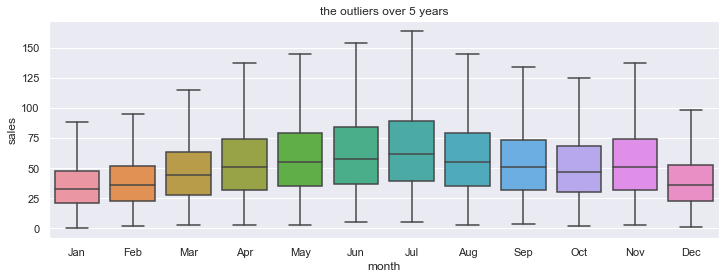

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=df,ax=ax ,showfliers=False)
ax.set_title('the outliers over 5 years')
plt.show()

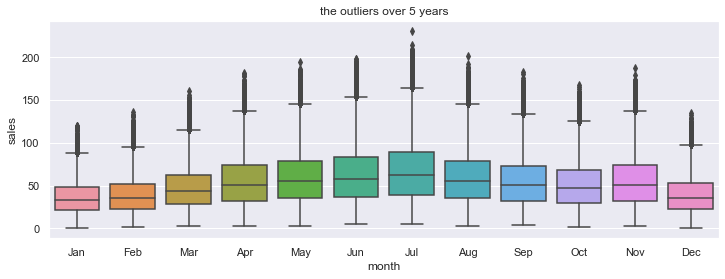

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=df,ax=ax)
ax.set_title('the outliers over 5 years')
plt.show()

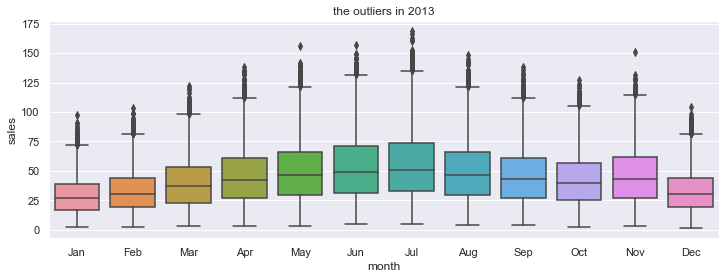

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=year13,ax=ax)
ax.set_title('the outliers in 2013')
plt.show()

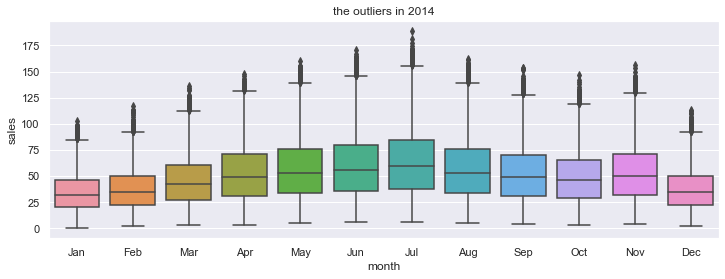

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=year14,ax=ax)
ax.set_title('the outliers in 2014')
plt.show()

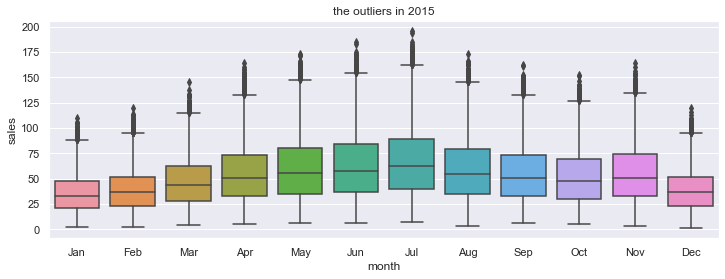

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=year15,ax=ax)
ax.set_title('the outliers in 2015')
plt.show()

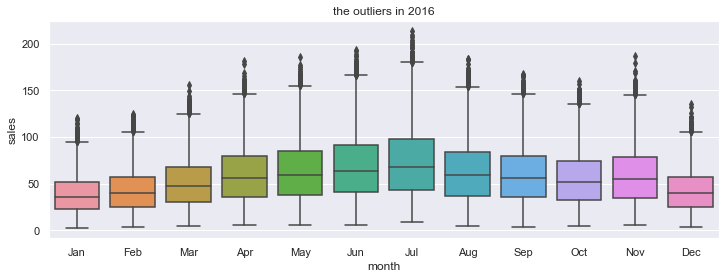

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=year16,ax=ax)
ax.set_title('the outliers in 2016')
plt.show()

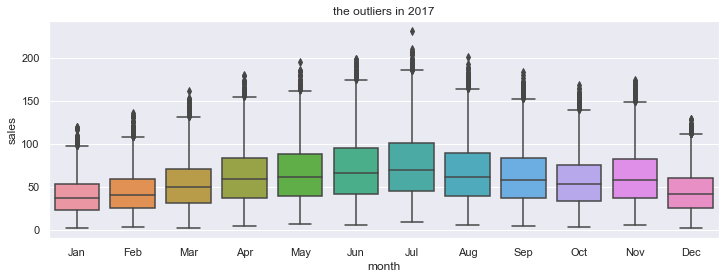

In [116]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sales',data=year17,ax=ax )
ax.set_title('the outliers in 2017')
plt.show()

In [72]:
year17.describe()

store           item          sales      year
count  182500.000000  182500.000000  182500.000000  182500.0
mean        5.500000      25.500000      58.815014    2017.0
std         2.872289      14.430909      31.552697       0.0
min         1.000000       1.000000       2.000000    2017.0
25%         3.000000      13.000000      34.000000    2017.0
50%         5.500000      25.500000      53.000000    2017.0
75%         8.000000      38.000000      78.000000    2017.0
max        10.000000      50.000000     231.000000    2017.0

In [73]:
year15.describe()

store           item          sales      year
count  182500.000000  182500.000000  182500.000000  182500.0
mean        5.500000      25.500000      52.256915    2015.0
std         2.872289      14.430909      28.158359       0.0
min         1.000000       1.000000       1.000000    2015.0
25%         3.000000      13.000000      30.000000    2015.0
50%         5.500000      25.500000      47.000000    2015.0
75%         8.000000      38.000000      70.000000    2015.0
max        10.000000      50.000000     196.000000    2015.0

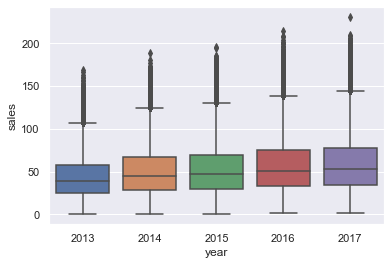

In [117]:
sns.boxplot(x='year', y='sales', data=df)

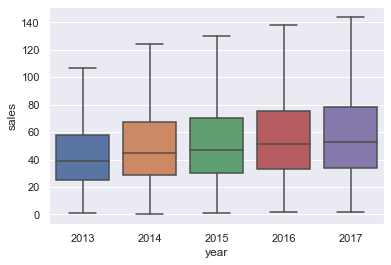

In [112]:
sns.boxplot(x='year', y='sales', data=df, showfliers=False)

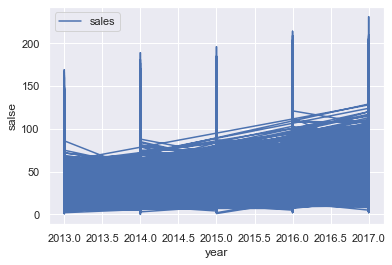

In [97]:

ax = df.plot('year', 'sales')
ax.set_ylabel('salse');

In [98]:
dy=df.groupby(df['year'])['sales'].sum() 
dy

year
2013     7941243
2014     9135482
2015     9536887
2016    10357160
2017    10733740
Name: sales, dtype: int64

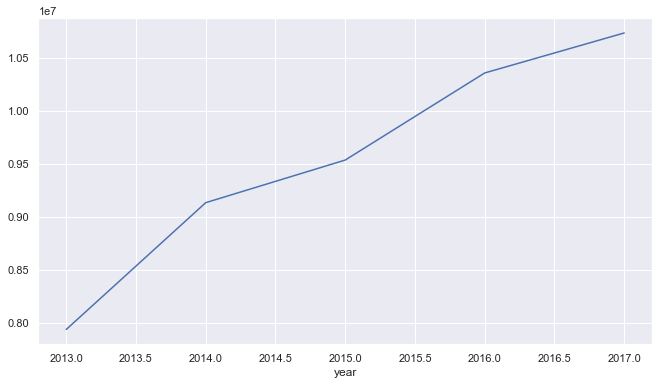

In [114]:
dy.plot(figsize=(11,6))

In [110]:
y13=year13.groupby('month').sales.sum()
y13

month
Apr    682274
Aug    766761
Dec    506607
Feb    459417
Jan    454904
Jul    855922
Jun    795597
Mar    617382
May    763242
Nov    692643
Oct    656587
Sep    689907
Name: sales, dtype: int64

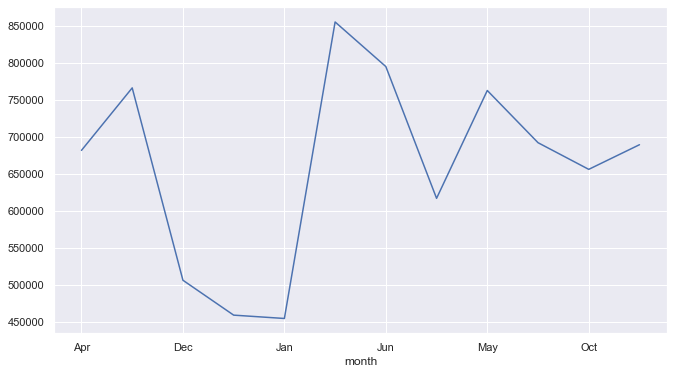

In [160]:
y13.plot(figsize=(11,6))

In [109]:
y14=year14.groupby('month').sales.sum()
y14

month
Apr    788914
Aug    885596
Dec    578048
Feb    529117
Jan    525987
Jul    989010
Jun    906842
Mar    704301
May    882877
Nov    800783
Oct    758883
Sep    785124
Name: sales, dtype: int64

In [157]:
year16['sales'].count()

183000

In [158]:
Q1 = year16['sales'].quantile(0.25)
Q3 = year16['sales'].quantile(0.75)
IQR = Q3 - Q1
trueList = ~((year16['sales'] < (Q1 - 1.5 * IQR)) &(year16['sales'] > (Q3 + 1.5 * IQR)))

trueList.describe()   
 

count     183000
unique         1
top         True
freq      183000
Name: sales, dtype: object

In [159]:
trueList

1095      True
1096      True
1097      True
1098      True
1099      True
          ... 
912630    True
912631    True
912632    True
912633    True
912634    True
Name: sales, Length: 183000, dtype: bool

In [1]:
ax = year13.groupby(df['date'].dt.month)['sales'].sum() 
ax.plot(figsize=(14,4),title="The Sales trend over 2013 ",)
plt.xlabel('2013-Months')
plt.ylabel('Sales')
plt.show()

NameError: name 'year13' is not defined

## Day3 - Day7 : do machine learning  part, every day we will try different algorithms to reach the best fit.



In [ ]:
ARIMA Machine Learning

Machine Learning

LSTM model deep learning